In [5]:
import random
import numpy as np
from sklearn.datasets import make_blobs

In [6]:
# load dataset
def data_generate():
    X, Y = make_blobs(n_samples=100, centers=2, random_state=7)
    x_train, y_train = X[:90], Y[:90]
    x_test, y_test = X[90:], Y[90:]
    
    return x_train, y_train, x_test, y_test


# 100 training examples and 10 test examples
x_train, y_train, x_test, y_test = data_generate()

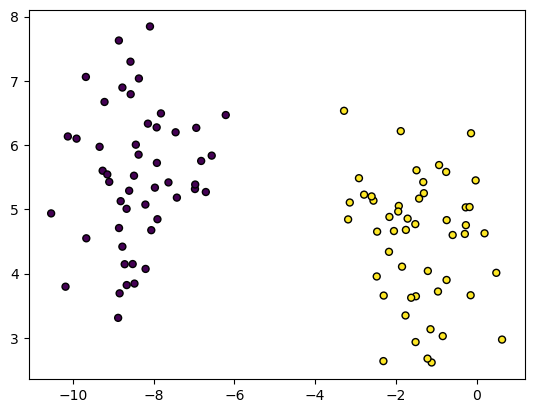

In [7]:
# visualization of the training examples
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x_train[:, 0], x_train[:, 1], marker="o", c=y_train, s=25, edgecolor="k")
plt.scatter(x_test[:, 0], x_test[:, 1], marker="o", c=y_test, s=25, edgecolor="k")
plt.show()

### Q1. KNN Classifier

In [8]:
# KNN classifier
def knn(x):
    '''
    Inputs:
    - x: A ndarray of shape (N, D) containing training data; there are N
      training samples each of dimension D.
    - k: the number of nearest neighbors.

In [16]:
    # TODO:
    # Implement the KNN classifer. 
    # Store the predicted labels in a variable named 'y_pred'.
import numpy as np

class NearestNeighbor:
    def __init__(self, k=5):
        self.k = k
    
    def train(self,X, y):
        self.Xtr = X
        self.ytr = y
    def predict(self,X):
        num_test = X.shape[0]
        Ypred = np.zeros(num_test, dtype = self.ytr.dtype)
        
        for i in range(num_test):
            distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)
            neighbors = np.argsort(distances)[:self.k]
            neighbor_labels = self.ytr[neighbors]
            unique, counts = np.unique(neighbor_labels, return_counts=True)
            Ypred[i] = unique[np.argmax(counts)]
            
        return Ypred
        

In [27]:
knn = NearestNeighbor(5)
knn.train(x_train, y_train)
Ypred_train = knn.predict(x_train)
Ypred_test = knn.predict(x_test)

train_acc = np.mean(Ypred_train == y_train)
test_acc = np.mean(Ypred_test == y_test)

print("Training Accuracy: ", train_acc)
print("Test Accuracy: ", test_acc)

Training Accuracy:  1.0
Test Accuracy:  1.0


### Q2. Linear Classifier
#### a. Complete the implementation of the LinearClassifier class.

In [22]:
# define the LinearClassifier class
class LinearClassifier:
    """An abstarct class for the linear classifiers"""
    def __init__(self, input_dim=2, output_dim=1):
        random.seed(0)
        np.random.seed(0)
        self.W = None
        self.b = None
        self.input_dim = input_dim
        self.output_dim = output_dim
    
    def param_init(self, W=None, b=None):
        if W is not None and W.shape == (self.input_dim, ):
            self.W = W
        else:
            self.W = np.random.randn(self.input_dim)
            
        if b is not None and b.shape == (self.output_dim, ):
            self.b = b
        else:
            self.b = np.random.randn(self.output_dim)
    
    def predict(self, x):

        if self.W is None or self.b is None:
            self.param_init()

        # TODO:
        # Implement the predict method.
        # Store the predicted labels in a variable named 'logits'.
        ##########################
        self.logits = np.dot(x, self.W) + self.b
        return self.logits

#### b. Complete the implementation of the cross entropy loss.

In [39]:
def cross_entropy_loss(y_pred, y_target):
    # TODO:
    # Implement the cross entropy loss of SVM
    # Store the average loss value in a variable named 'loss'.
    ##########################
    # Your Code #
    ########################## 
    # Replace "pass" statement with your code
    N = len(y_pred)
    return 1/N * sum(-(y_target*np.log(1/(1+np.exp(-y_pred))) + (1-y_target)*np.log(1/(1+np.exp(-(1-y_pred))))))


#### c. Complete the implementation of the svm hinge loss.

In [42]:
def svm_loss(y_pred, y_target):

    # TODO:
    # Implement the hinge loss of SVM.
    # Store the average loss value in a variable named 'loss'.
    ##########################
   
    y_target = [-1 if i == 0 else 1 for i in y_target]
    N = y_pred.shape[0]  # Number of samples
    loss = np.maximum(0, 1 - y_target * y_pred).mean()
    return loss

#### d. Try different groups of weight & bias. 

In [43]:
# define a LinearClassifier object
Linear_Classifier = LinearClassifier(input_dim=x_train.shape[1], output_dim=1)
# TODO: 
# Use the method 'LinearClassifier.param_init()' in utils to parameterize the linear classifier with a group of weight & bias. 
# Use the method 'LinearClassifier.predict()' in utils to get the predicted labels of test examples from the linear classifier. Store the predicted labels in a variable named 'y_pred'.
Linear_Classifier.param_init(W=np.array([-1.9,1.1]), b=np.array([0.1]))
y_pred = Linear_Classifier.predict(x_test)

In [44]:
# TODO:
# Try different groups of weight & bias to parameterize the linear classifier and espectively get their predictions of test examples.
# Which group is the best? The answer should be based on different evaluation metrics, i.e. cross entropy loss and svm loss. #
# Use the method 'LinearClassifier.predict()' to get the predictions. #
# Use the methods 'cross_entropy_loss()' and 'svm_loss()'. Calculate the loss between the predictions and the targets

group1_loss1 = cross_entropy_loss(y_pred, y_test)
group1_loss2 = svm_loss(y_pred, y_test)

Linear_Classifier.param_init(W=np.array([2.1,0.9]), b=np.array([-0.2]))
y_pred = Linear_Classifier.predict(x_test)

group2_loss1 = cross_entropy_loss(y_pred, y_test)
group2_loss2 = svm_loss(y_pred, y_test)

print("group1_loss1=" + str(group1_loss1))
print("group1_loss2=" + str(group1_loss2))
print("group2_loss1=" + str(group2_loss1))
print("group2_loss2=" + str(group2_loss2))

group1_loss1=8.836676101135836
group1_loss2=9.633352008200415
group2_loss1=0.6831611919232482
group2_loss2=0.9759790312553133


Group 2 is a better parameterization over the test set because it has lower svm loss and lower cross entropy loss. 

#### 3. Do you have any suggestions for this course?


For review purposes, I suggest that we can have lecture recordings.
Post partial answers such as numerical value derived in the process for homework before submission deadline to help us check our code. 

In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

# Load the data using pandas
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')
print(data.columns)
# Initialize the Dash app
app = dash.Dash(__name__)

# Set the title of the dashboard
#app.title = "Automobile Statistics Dashboard"

#---------------------------------------------------------------------------------
# Create the dropdown menu options
dropdown_options = [
    {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
    {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
]
# List of years 
year_list = [i for i in range(1980, 2024, 1)]
#---------------------------------------------------------------------------------------
# Create the layout of the app
app.layout = html.Div([
    #TASK 2.1 Add title to the dashboard
    html.H1("Automobile Sales Statistics Dashboard",
        style={'textAlign': 'center', 'color': '#503D36', 'fontSize': 24}),#May include style for title
    html.Div([#TASK 2.2: Add two dropdown menus
        html.Label("Select Statistics:"),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=[
                {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
                {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
                ],
            value='Select Statistics',
            placeholder='Select a report type'
        )
    ]),
    html.Div(dcc.Dropdown(
            id='select-year',
            options=[{'label': i, 'value': i} for i in year_list],
            value='input-year'
        )),
    html.Div([#TASK 2.3: Add a division for output display
    html.Div(id='output-container', className='chart-grid', style={'display': 'flex'}),])
])
#TASK 2.4: Creating Callbacks
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output(component_id='select-year', component_property='disabled'),
    Input(component_id='dropdown-statistics',component_property='value'))

def update_input_container(selected_statistic):
    if selected_statistic == 'Yearly Statistics': 
        return False
    else: 
        return True

#Callback for plotting
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='select-year', component_property='value'), Input(component_id='dropdown-statistics', component_property='value')])


def update_output_container(selected_year, selected_statistic):
    
    if selected_statistic == 'Recession Period Statistics':
        # Filter the data for recession periods
        recession_data = data[data['Recession'] == 1]

       
        
#TASK 2.5: Create and display graphs for Recession Report Statistics

#Plot 1 Automobile sales fluctuate over Recession Period (year wise)
        # use groupby to create relevant data for plotting
        yearly_rec=recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        R_chart1 = dcc.Graph(
            figure=px.line(yearly_rec, 
                x='Year',
                y='Automobile_Sales',
                title="Average Automobile Sales fluctuation over Recession Period"))

#Plot 2 Calculate the average number of vehicles sold by vehicle type       
        # use groupby to create relevant data for plotting
        average_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        R_chart2 = dcc.Graph(
            figure=px.bar(average_sales,
                        x='Vehicle_Type',
                        y='Automobile_Sales',
                        title="Average Number of Vehicles Sold by Vehicle Type"))
# Plot 3 Pie chart for total expenditure share by vehicle type during recessions
        # use groupby to create relevant data for plotting
        exp_rec = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        R_chart3 = dcc.Graph(
            figure=px.pie(exp_rec,
                        values='Advertising_Expenditure',
                        names='Vehicle_Type',
                        title="Total Expenditure Share by Vehicle Type During Recessions")
)


# Plot 4 bar chart for the effect of unemployment rate on vehicle type and sales
        # Assuming 'data' is your DataFrame and it has 'Unemployment_Rate', 'Vehicle_Type', and 'Sales'
        effect_data = data.groupby(['unemployment_rate', 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()
        R_chart4 = dcc.Graph(
            figure=px.bar(effect_data,
                        x='unemployment_rate',
                        y='Automobile_Sales',
                        color='Vehicle_Type',
                        barmode='group',
                        title="Effect of Unemployment Rate on Vehicle Type and Sales"))



        return [
            html.Div(className='chart-item', children=[html.Div(children=R_chart1),html.Div(children=R_chart2)]),
            html.Div(className='chart-item', children=[html.Div(children=R_chart3),html.Div(R_chart4)])
            ]

# TASK 2.6: Create and display graphs for Yearly Report Statistics
 # Yearly Statistic Report Plots                             
    elif (selected_year and selected_statistic=='Yearly Statistics') :
        yearly_data = data[data['Year'] == selected_year]
                              
#TASK 2.5: Creating Graphs Yearly data
                              
#plot 1 Yearly Automobile sales using line chart for the whole period.
        yas= data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        Y_chart1 = dcc.Graph(
            figure=px.line(yas, x='Year', y='Automobile_Sales', title='Yearly Automobile Sales'))

            
# Plot 2 Total Monthly Automobile sales using line chart.
        monthly_sales = yearly_data.groupby('Month')['Automobile_Sales'].sum().reset_index()
        Y_chart2 = dcc.Graph(
            figure=px.line(monthly_sales, x='Month', y='Automobile_Sales', title='Total Monthly Automobile Sales in {}'.format(selected_year)))

            # Plot bar chart for average number of vehicles sold during the given year
        avr_vdata = yearly_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        Y_chart3 = dcc.Graph(
            figure=px.bar(avr_vdata, x='Vehicle_Type', y='Automobile_Sales', title='Average Vehicles Sold by Vehicle Type in the Year {}'.format(selected_year)))

            # Total Advertisement Expenditure for each vehicle using pie chart
        exp_data=yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].mean().reset_index()
        Y_chart4 = dcc.Graph(
            figure=px.pie(exp_data, values='Advertising_Expenditure', names='Vehicle_Type', title='Total Advertisement Expenditure for Each Vehicle Type in {}'.format(selected_year)))


#TASK 2.6: Returning the graphs for displaying Yearly data
        return [
                html.Div(className='chart-item', children=[html.Div(Y_chart1),html.Div(Y_chart2)]),
                html.Div(className='chart-item', children=[html.Div(Y_chart3),html.Div(Y_chart4)])
                ]
        
    else:
        return None

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)

